## Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
sal = pd.read_csv('Salary_Data.csv')

In [3]:
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
sal = sal.rename(columns={"Salary":"hike","YearsExperience":"years"})
sal.head(5)

,years,hike
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   years   30 non-null     float64
 1   hike    30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [7]:
sal.describe()

,years,hike
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: xlabel='hike', ylabel='Count'>

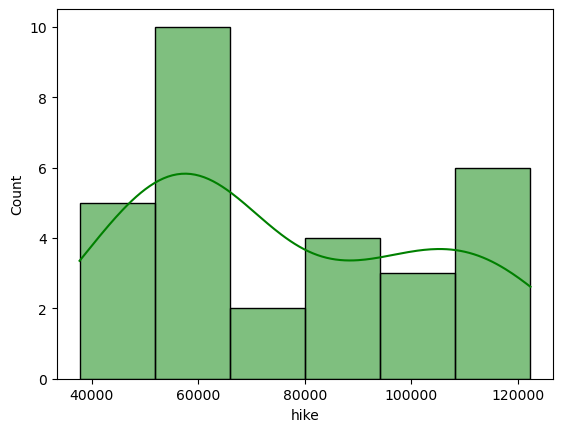

In [8]:
sns.histplot(sal["hike"], color ='green',kde=True)

<Axes: xlabel='years', ylabel='Count'>

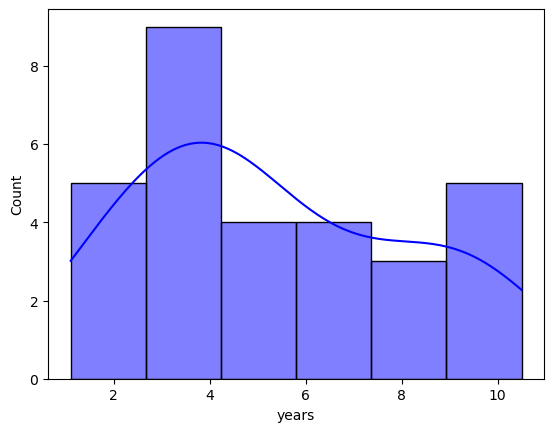

In [9]:
sns.histplot(sal["years"], color ='blue',kde=True)

<Axes: >

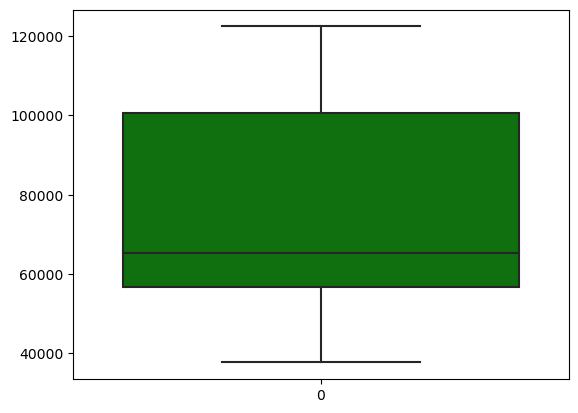

In [10]:
sns.boxplot(sal["hike"], color ='green')

<Axes: >

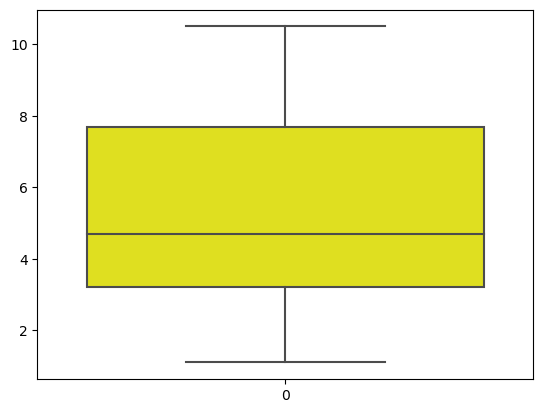

In [11]:
sns.boxplot(sal["years"], color ='yellow')

<Axes: xlabel='years', ylabel='hike'>

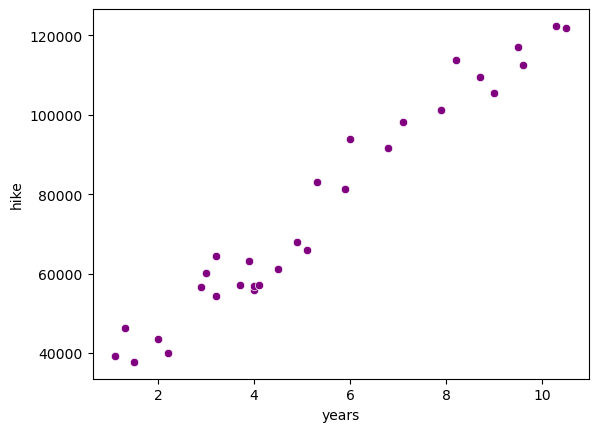

In [12]:
sns.scatterplot(y="hike",x="years",data=sal, color = "purple" )

In [13]:
np.corrcoef(sal["years"],sal["hike"])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [14]:
import statsmodels.formula.api as smf
model1= smf.ols('hike~years',data = sal).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           1.14e-20
Time:                        22:02:13   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years       9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

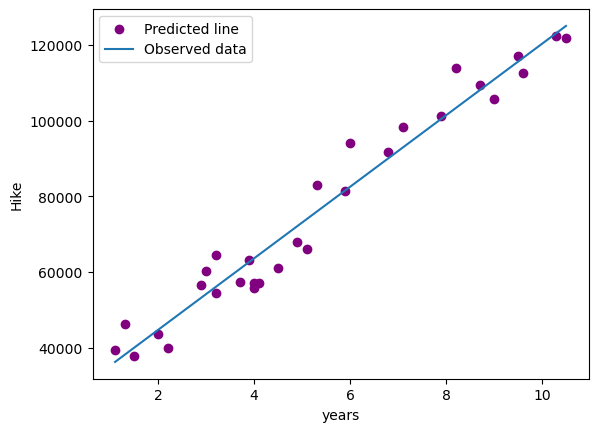

In [15]:
pred1 = model1.predict(pd.DataFrame(sal['years']))
plt.scatter(x="years",y="hike",data=sal, color = "purple" )
plt.plot(sal['years'],pred1)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('years')
plt.ylabel('Hike')
plt.show()

In [16]:
res1 = sal.hike - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

5592.043608760662

array([[1.        , 0.92406108],
       [0.92406108, 1.        ]])

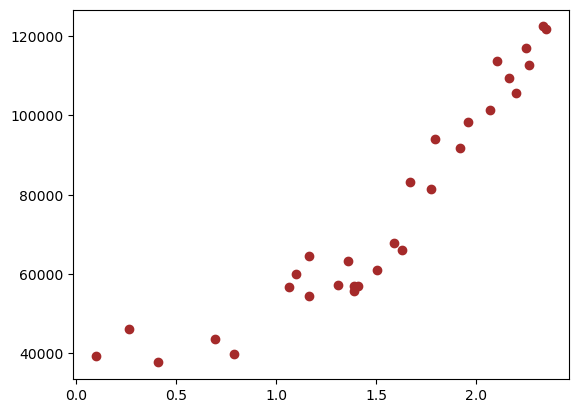

In [17]:
plt.scatter(x = np.log(sal['years']), y = sal['hike'], color = 'brown')
np.corrcoef(np.log(sal['years']),sal['hike'] ) 

In [18]:
model2= smf.ols('hike ~ np.log(years)',data = sal).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           3.25e-13
Time:                        22:02:14   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(years)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

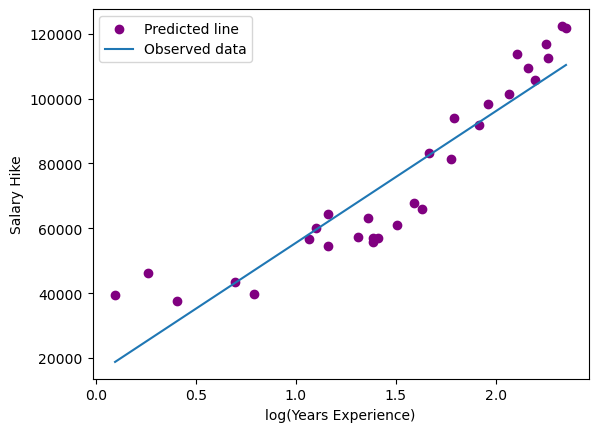

In [19]:
pred2 = model2.predict(pd.DataFrame(sal['years']))
plt.scatter(x=np.log(sal["years"]),y="hike",data= sal, color = "purple" )
plt.plot(np.log(sal['years']),pred2)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('log(Years Experience)')
plt.ylabel('Salary Hike')
plt.show()

In [20]:
res2 = sal.hike- pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

10302.893706228302

array([[1.        , 0.96538444],
       [0.96538444, 1.        ]])

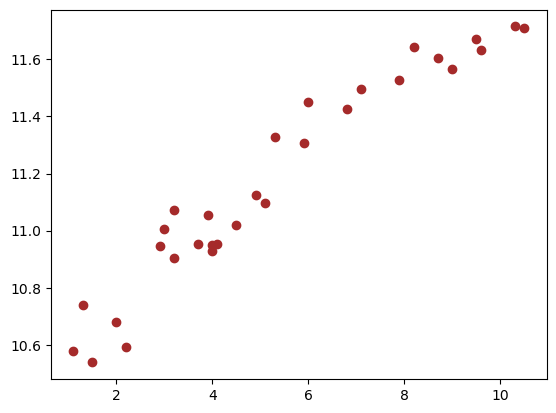

In [21]:
plt.scatter(x = sal['years'], y= np.log(sal['hike']), color = 'brown')
np.corrcoef(sal['years'],np.log(sal['hike']) )

In [22]:
import statsmodels.formula.api as smf
model3= smf.ols('np.log(hike) ~ years',data = sal).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(hike)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           7.03e-18
Time:                        22:02:15   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
years          0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

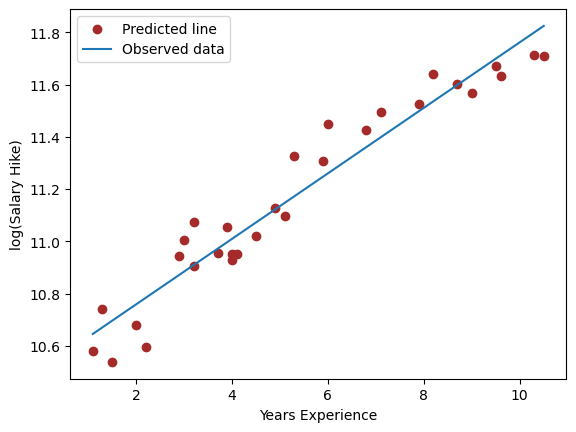

In [23]:
pred3 = model3.predict(pd.DataFrame(sal['years']))
pred3_exp = np.exp(pred3)
plt.scatter(x =(sal['years']), y = np.log(sal['hike']), color = 'brown')
plt.plot(sal['years'],pred3)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('Years Experience')
plt.ylabel('log(Salary Hike)')
plt.show()

In [24]:
res3 = sal.hike - pred3_exp
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

7213.235076620165

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(sal, test_size = 0.25,random_state=6)

finalmodel = smf.ols('hike ~ years', data = train).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     466.2
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.49e-15
Time:                        22:02:16   Log-Likelihood:                -220.21
No. Observations:                  22   AIC:                             444.4
Df Residuals:                      20   BIC:                             446.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.308e+04   2703.085      8.537      0.000    1.74e+04    2.87e+04
years       9743.7053    451.284     21.591      0.000    8802.343    1.07e+04
==============================================================================
Omnibus:                        2.296   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                1.918
Skew:                           0.678   Prob(JB):                        0.383
Kurtosis:                       2.494   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
train_pred = finalmodel.predict(pd.DataFrame(train))
train_pred 

22    100052.488857
18     80565.078289
2      37692.775039
8      54257.074022
21     92257.524629
4      44513.368738
14     66923.890891
12     62052.038249
26    115642.417311
23    102975.600442
24    107847.453084
11     62052.038249
1      35744.033982
16     72770.114062
25    110770.564669
15     70821.373005
13     63026.408778
29    125386.122595
20     89334.413044
3      42564.627681
9      59128.926664
10     61077.667721
dtype: float64

In [27]:
train_res = train.hike - train_pred
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

5380.955240928119

In [28]:
test_pred = finalmodel.predict(pd.DataFrame(test))
test_pred

0      33795.292926
28    123437.381538
27    116616.787839
6      52308.332965
17     74718.855118
19     81539.448817
7      54257.074022
5      51333.962437
dtype: float64

In [29]:
test_pred = finalmodel.predict(pd.DataFrame(test))
test_pred

0      33795.292926
28    123437.381538
27    116616.787839
6      52308.332965
17     74718.855118
19     81539.448817
7      54257.074022
5      51333.962437
dtype: float64